In [ ]:
import math
from sklearn import datasets, naive_bayes
import numpy as np
import scipy.stats as stats

In [4]:
np.random.seed(1345)

# Load the wine dataset (description here http://scikit-learn.org/stable/datasets/index.html#diabetes-dataset)
wine = datasets.load_wine()
data = wine.data.copy()
target = wine.target.copy()

# Split the data into train/test sets
total_samples = wine.target.shape[0]
exclude = round(total_samples/3)
indices = np.arange(0,total_samples)
np.random.shuffle(indices)

idx_train = indices[:-exclude]
idx_test = indices[-exclude:]

assert not np.intersect1d( idx_test, idx_train ).size

X_train = data[idx_train]
X_test = data[idx_test]

# Split the targets into training/testing sets
y_train = target[idx_train]
y_test = target[idx_test]


[0 1 2 2 2 0 0 0 1 2 1 0 1 1 1 0 1 1 0 1 0 2 0 1 2 2 2 2 0 0 2 2 1 1 0 1 1
 1 2 1 0 2 1 0 2 1 0 1 1 1 0 1 1 0 1 0 2 1 2]


In [52]:
class GaussianNB:
    def __init__(self):
        self.classes = []
        self.features = 0
        self.observations = 0

        self.class_means = dict()
        self.class_stds = dict()
        self.class_prior_probs = dict()
        self.class_likelihoods = dict()
        self.class_posterior_probs = []

        self.predictions = []
                
    def fit(self, X_train, y_train):
        self.classes = np.unique(y_train).astype(int)
        self.features = X_train.shape[1]
        self.observations = X_train.shape[0]

        # train model for each class
        for c in self.classes:
            # Calculate Prior Probabilities
            self.class_prior_probs[c] = np.sum(y_train==c) / self.observations

            # Train a Gaussian model of the likelihood P(Feature Value|Class) by calculating the 
            # means and std's of each feature for each of the classes 
            self.class_means[c] = X_train[y_train==c].mean(0) 
            self.class_stds[c] = X_train[y_train==c].std(0)

        
    def predict(self, X_test):
        for c in self.classes:
            # Evaluate likelihoods of test data
            likelihood = 1
            for feature in range(self.features):
                likelihood = likelihood * stats.norm.pdf(X_test[:,feature], self.class_means[c][feature], self.class_stds[c][feature])
            self.class_likelihoods[c] = likelihood
        
            # Approximate the posterior probabilities - P(X|Y)*P(Y)
            self.class_posterior_probs.append(self.class_prior_probs[c]*self.class_likelihoods[c])
        
        # Predict the class by selecting the class with the maximum posterior probability
        self.predictions = np.argmax(self.class_posterior_probs,0)
        print(np.argmax(self.class_posterior_probs,0))
        
        return self.predictions
  

gaussian_nb = GaussianNB()
gaussian_nb.fit(X_train, y_train_bin)
y_pred_bin = gaussian_nb.predict(X_test)

# Evaluate model performance
print(metrics.confusion_matrix(y_test_bin, y_pred_bin))
print("accuracy: %.2f" % metrics.accuracy_score(y_test, y_pred))

[1 0 0 0 0 1 1 1 0 0 0 0 0 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 0 0 0 1 0 0
 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 1 1 0 1 0 0 0]
[[40  1]
 [ 2 16]]
accuracy: 0.95


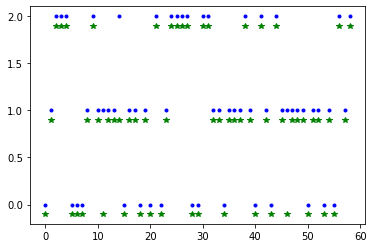

[[16  2  0]
 [ 0 24  1]
 [ 0  0 16]]
accuracy: 0.95
class 0, precision: 1.00, recall: 0.89,  f-score: 0.94
class 1, precision: 0.92, recall: 0.96,  f-score: 0.94
class 2, precision: 0.94, recall: 1.00,  f-score: 0.97


In [5]:
import matplotlib.pyplot as plt
import sklearn.metrics as metrics

# create a naive Bayes model with Gaussian observations
nb = naive_bayes.GaussianNB()

# Train using training set
nb.fit(X_train, y_train)

# Predict using test set
y_pred = nb.predict(X_test)

# Plot outputs
plt.plot(y_test-0.1,'g*')
plt.plot(y_pred,'b.')
plt.show()

# evaluation
print(metrics.confusion_matrix(y_test, y_pred))
print("accuracy: %.2f" % metrics.accuracy_score(y_test, y_pred))

# calculate precision and recall (and f-score, a weighted average of precision and recall) 
precision,recall,fscore,_ = metrics.precision_recall_fscore_support(y_test,y_pred )
for c in np.unique(y_test):
        print("class %s, precision: %.2f, recall: %.2f,  f-score: %.2f" % (c, precision[c], recall[c], fscore[c]))

